<a href="https://colab.research.google.com/github/VakhromeevaKate/sechenov-ai-methods-course/blob/main/ML_HowItWorks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Машинное обучение: что это такое и как оно работает

Машинное обучение (Machine Learning, ML) — это область искусственного интеллекта, которая позволяет компьютерам обучаться на данных без явного программирования.

Программирование:
Входные данные + Алгоритм = Результат

ML:
Входные данные + Результат = "Программа" (условно, т.к. по сути это подбор наиболее удачных весов)

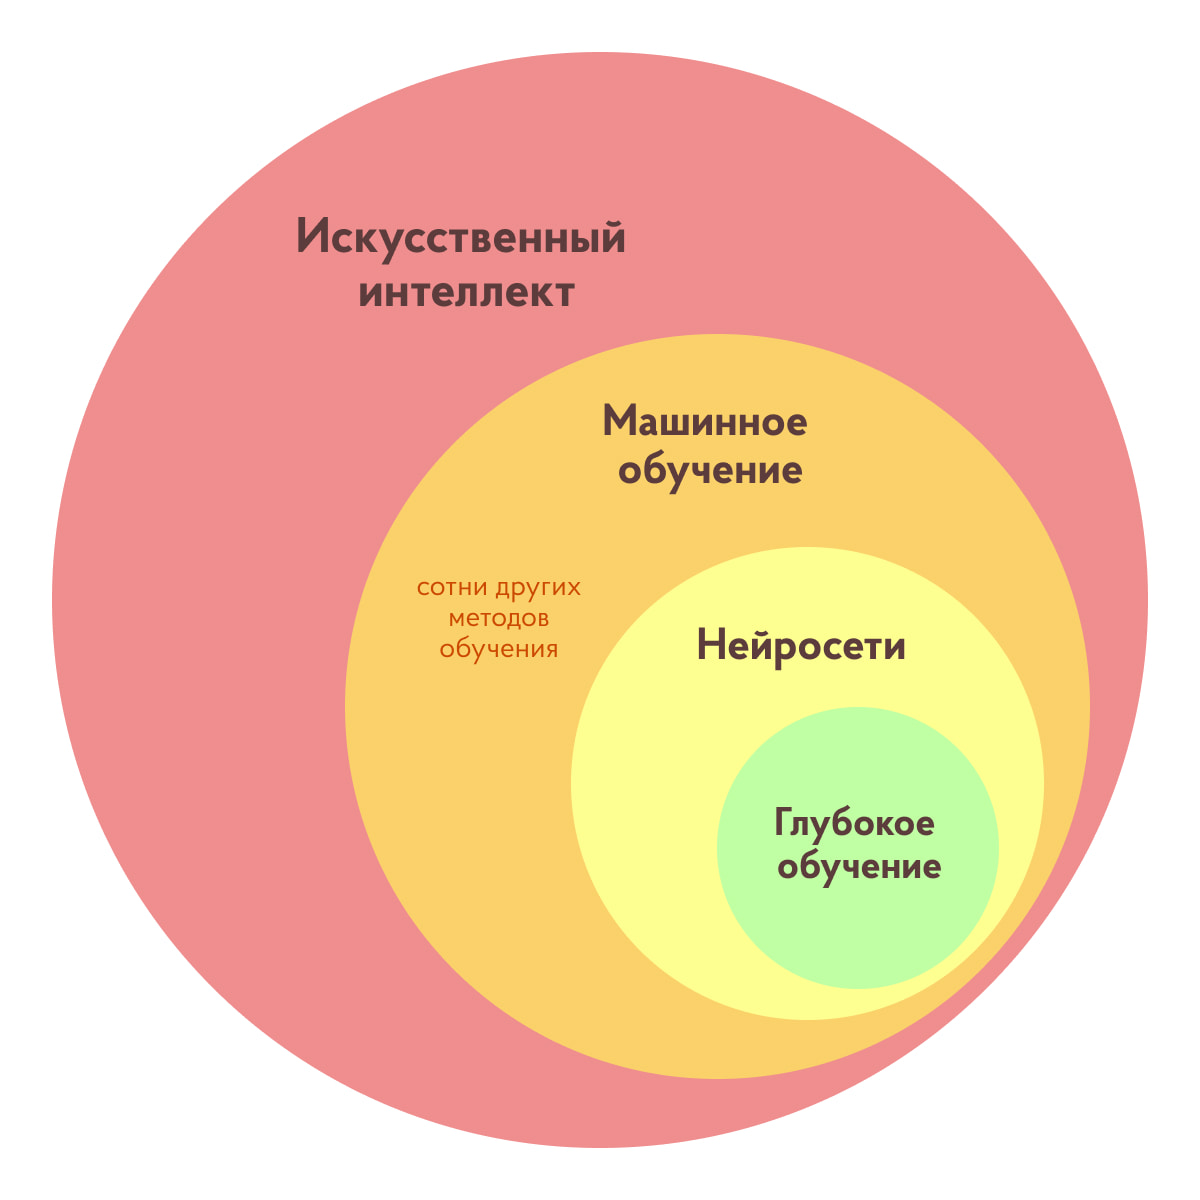

Основные виды:

### Обучение с учителем (Supervised Learning)

Задача: предсказание
Данные: размеченные (заранее известные правильные ответы на обучающей выборке)
Примеры: Классификация, регрессия

** есть еще semi-supervised

### Обучение без учителя (Unsupervised Learning)

Задача: Поиск закономерностей в данных и из обобщение без разметки
Примеры: Кластеризация, снижение размерности

### Обучение с подкреплением (Reinforcement Learning)

Задача: Обучение через взаимодействие со средой
Примеры: Игровые модели, робототехника

## Нейрон

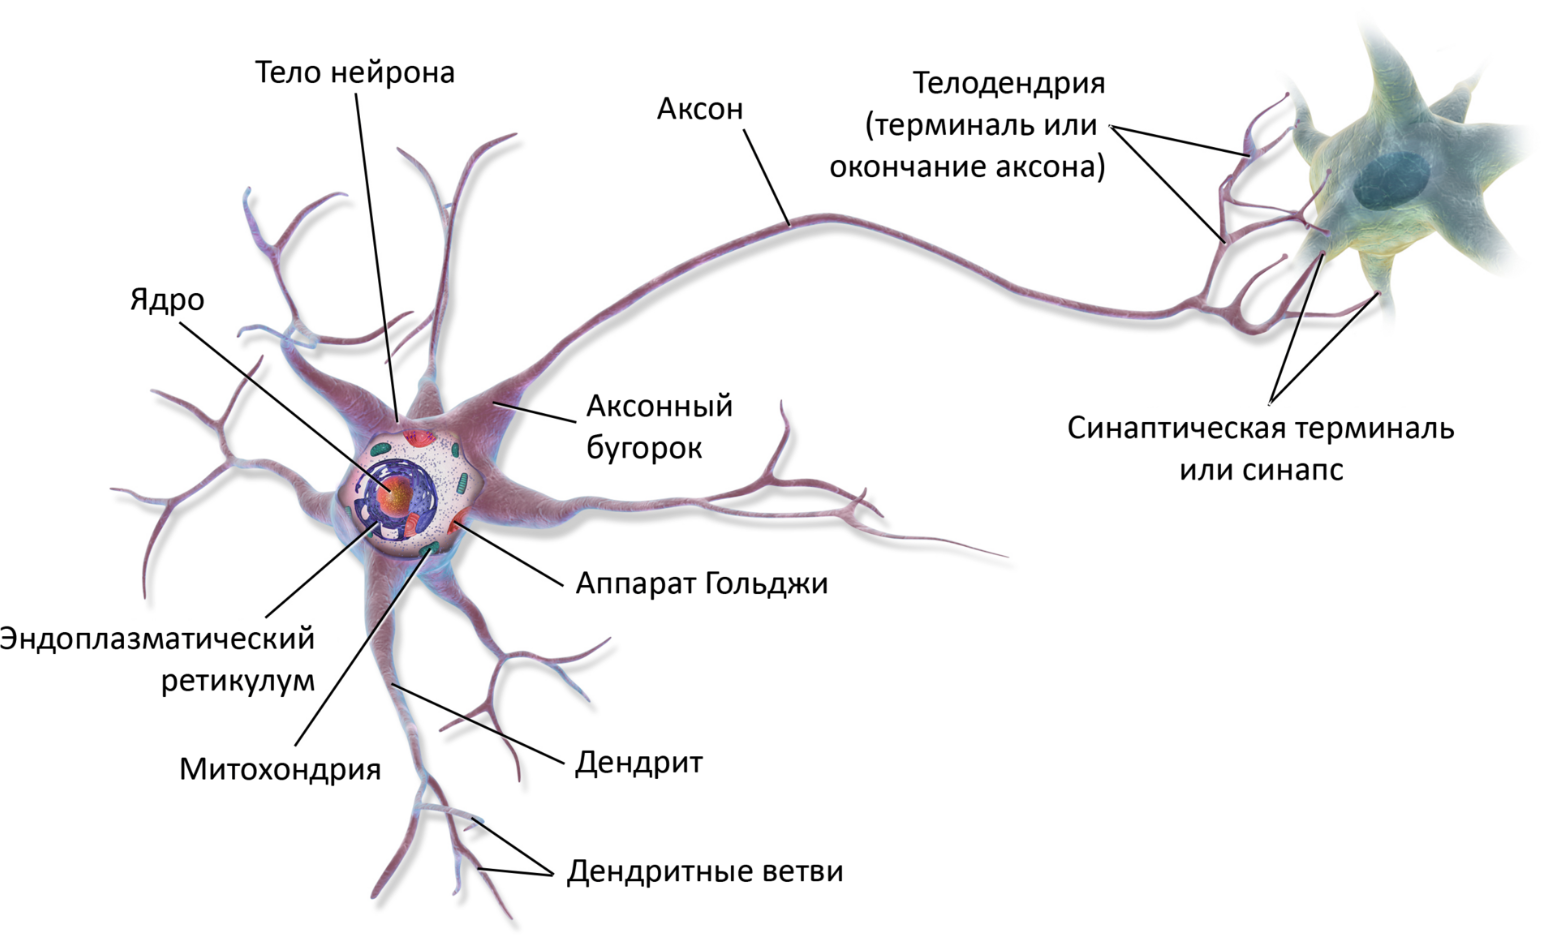

## Математическая модель нейрона

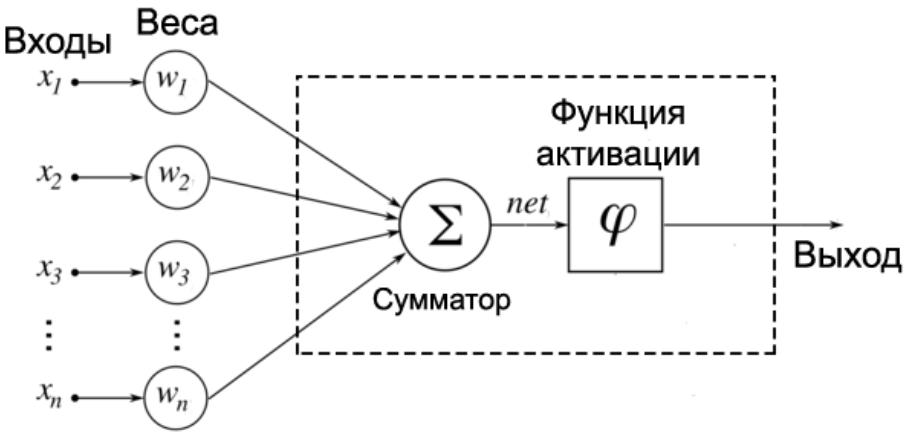

Функция активации — это математическая функция, которая применяется к выходу нейрона, определяя, должен ли нейрон "активироваться" или нет. Она вводит нелинейность в нейронную сеть.

neuron_output = activation_function(∑(w_i * x_i) + b)

Нейрон всегда линеен (мы видим это по формуле)

Что будет, если мы объединим несколько нейронов?

## Нейронная сеть



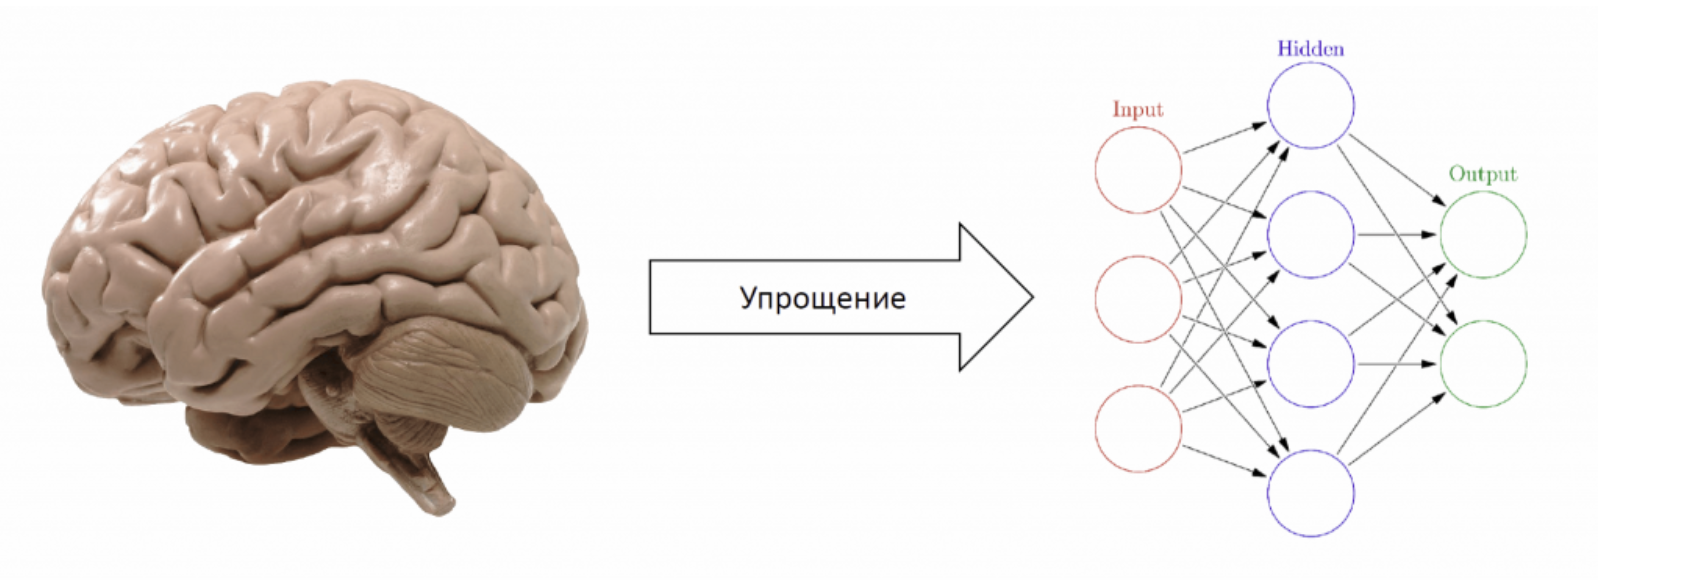

Функция потерь - это функция, которая определяет "стоимость" ошибки или расхождение между предсказанным моделью значением и истинным значением. Основная цель при обучении модели — минимизировать эту функцию потерь, чтобы повысить точность прогнозов.

## Линейная регрессия

Линейная функция:

y = w * x + b

Линейная регрессия моделирует отношения как линейную комбинацию признаков:

y = w₁*x₁ + w₂*x₂ + ... + wₙ*xₙ + b

где:

y — целевая переменная

xᵢ — признаки (features)

wᵢ — веса (weights)

b — смещение (bias)


Компактная запись через матрицы:

Для набора из m наблюдений и n признаков:

Y = X × W + ε

Y ∈ ℝᵐ — вектор целевых переменных

X ∈ ℝᵐˣⁿ — матрица признаков (с добавленным столбцом единиц для смещения)

W ∈ ℝⁿ — вектор весов (включая смещение)

ε ∈ ℝᵐ — вектор ошибок

Геометрическая интерпретация: В n-мерном пространстве мы ищем гиперплоскость, которая наилучшим образом приближает облако точек данных.

## Как перемножать матрицы

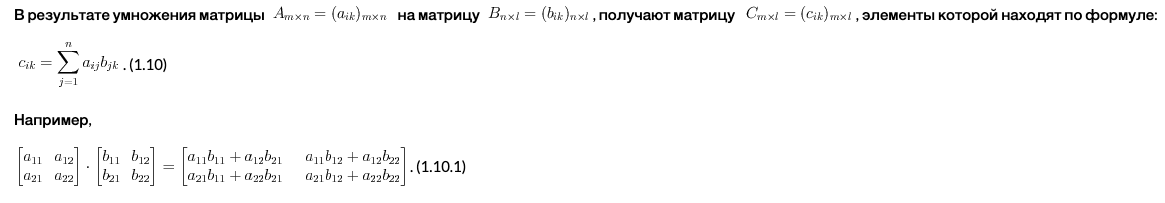

In [1]:
%pip install numpy

^C


In [2]:
import numpy as np

# первая матрица будет состоять из шести чисел от 0 до 5
a = np.arange(6).reshape(2, 3)

# возьмем тот же код,
# но зададим обратный порядок по обоим измерениям
b = a.T

c = np.arange(6).reshape(2, 3)

print(f' a * b = {np.dot(a, b)}')
print(f' a * c.T = {np.dot(a, c.T)}')

 a * b = [[ 5 14]
 [14 50]]
 a * c.T = [[ 5 14]
 [14 50]]


Данные:
Сегодня 15°C -> Завтра 16°C
Сегодня 16°C -> Завтра 18°C
Сегодня 18°C -> Завтра 20°C
Сегодня 20°C -> Завтра 22°C
Сегодня 22°C -> Завтра 24°C
Сегодня 24°C -> Завтра 23°C
Сегодня 23°C -> Завтра 21°C
Сегодня 21°C -> Завтра 19°C
Сегодня 19°C -> Завтра 17°C

Если сегодня 18°C, то завтра будет 0.7°C


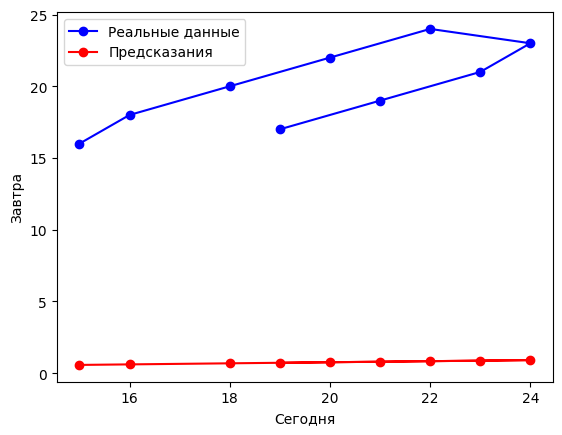

In [6]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# Данные:
# сегодня
X = np.array([[15], [16], [18], [20], [22], [24], [23], [21], [19]])
# завтра
y = np.array([16, 18, 20, 22, 24, 23, 21, 19, 17])

print("Данные:")
for i in range(len(X)):
    print(f"Сегодня {X[i][0]}°C -> Завтра {y[i]}°C")

# Модель - https://keras.io/guides/sequential_model/
model = keras.Sequential([keras.layers.Dense(1)]) # полносвязный слой
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=10, verbose=0)

# Предсказание
today_temp = 18
tomorrow_pred = model.predict(np.array([[today_temp]]), verbose=0)[0][0]
print(f"\nЕсли сегодня {today_temp}°C, то завтра будет {tomorrow_pred:.1f}°C")

# График
predictions = model.predict(X, verbose=0)
plt.plot(X, y, 'bo-', label='Реальные данные')
plt.plot(X, predictions, 'ro-', label='Предсказания')
plt.xlabel('Сегодня')
plt.ylabel('Завтра')
plt.legend()
plt.show()